# **Deep Learning Project** - Aerial Perspective Object Detection
SEP 769 - Group 2

In [26]:
#About semantic segmentation: https://www.jeremyjordan.me/semantic-segmentation/
#TF Tutorial: https://www.tensorflow.org/tutorials/images/segmentation
#TF load and process images: https://www.tensorflow.org/tutorials/load_data/images

#Different image nets: https://medium.com/analytics-vidhya/cnns-architectures-lenet-alexnet-vgg-googlenet-resnet-and-more-666091488df5
#TF Resnet: 


from google.colab import drive
import tensorflow as tf
import tensorflow_datasets as tfds
drive.mount('/content/gdrive')
import cv2
import glob
import numpy as np
import os
import fnmatch
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

if not os.path.exists("/content/gdrive/Shareddrives/SEP_769/data/drone_data/"):
  !unzip "/content/gdrive/Shareddrives/SEP_769/drone_data.zip" -d "/content/gdrive/Shareddrives/SEP_769/data"

#image1 = cv2.imread('{}000.jpg'.format(original_images_path)) #original size image
#image2 = cv2.resize(cv2.imread('{}000.jpg'.format(original_images_path), flags=1), (0,0), fx=0.05, fy=0.05)  #smaller image
#print(image1.shape)
#print(image2.shape)

#print('\nTotal of {} images at path: \n{}\n\n'.format(image_count, original_images_path))

#40 for test
#360 for train

#pixel accuracy, Intersection over Union (IOU)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#*Constants and Functions*

In [28]:
original_images_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/original_images/'
original_semantic_path = '/content/gdrive/Shareddrives/SEP_769/data/drone_data/label_images_semantic/'
HEIGHT = 200
WIDTH = 300
EPOCHS = 25
BATCHSIZE = 6 
VAL_SPLIT = 0.9

# reads images from dir, resizes and returns np array
# optional file type argument ext
def images_to_array(dir, width, height, ext='.jpg'):
  data = []
  files = os.listdir(dir)
  files.sort()
  for filename in files:
    if filename.endswith(ext):
      img = cv2.imread(dir+filename,flags=1)
      img = cv2.resize(img, (width, height))
      data.append(img)

  return np.array(data)

def labels_to_array(dir, width, height, ext='.jpg'):
  data = []
  files = os.listdir(dir)
  files.sort()
  for filename in files:
    if filename.endswith(ext):
      img = cv2.imread(dir+filename,flags=0)
      img = cv2.resize(img, (width, height))
      data.append(img)

  return np.array(data)

# displays a number of originals with their masks
def display_images(images):
  plt.figure(figsize=(15,10))
  for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    if len(images[i].shape) == 3:
      plt.imshow(images[i])
    else:
      plt.imshow(images[i], cmap="gray", vmin=0, vmax=255)
  plt.show()



#plt.imshow(original_images[0])
#plt.show()
#print(original_images[0].shape)
#plt.imshow(semantic_images[0])
#plt.show()
#print(semantic_images[0].shape) 

#Prepping Import Data

In [37]:
images = images_to_array(original_images_path, width=WIDTH, height=HEIGHT)
print(images.shape)

labels = labels_to_array(original_semantic_path, width=WIDTH, height=HEIGHT, ext='png')
print(labels.shape)

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.1)
X_train, X_val, Y_train, Y_val, = train_test_split(x_train, y_train, test_size=0.2)
X_train = X_train / 255.0
x_test = x_test / 255.0
X_val = X_val / 255.0
Y_train = Y_train / 22
y_test = y_test / 22
Y_val = Y_val / 22


print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(x_test.shape)
print(y_test.shape)


#Old Image Import
#original_images = [cv2.resize(cv2.imread(file, flags=1), (0,0), fx=0.05, fy=0.05) for file in glob.glob('{}*.jpg'.format(original_images_path))]  #importing images in color at 5% scale
#semantic_images = [cv2.resize(cv2.imread(file, flags=0), (0,0), fx=0.05, fy=0.05) for file in glob.glob('{}*.png'.format(original_semantic_path))]  #importing images segmented
#print(original_images.shape)
#print(semantic_images.shape)

#image_count = len(fnmatch.filter(os.listdir(original_images_path), '*.jpg'))
#print('\nTotal of {} images at path: \n{}\n\n'.format(image_count, original_images_path))
#image_count = len(fnmatch.filter(os.listdir(original_semantic_path), '*.png'))
#print('\nTotal of {} images at path: \n{}\n\n'.format(image_count, original_semantic_path))

#train_images, test_images = tf.split(images, [360,40])
#print(train_images.shape)
#print(test_images.shape)

#train_labels, test_labels = tf.split(labels, [360,40])
#print(train_labels.shape)
#print(test_labels.shape)

(400, 200, 300, 3)
(400, 200, 300)
(288, 200, 300, 3)
(288, 200, 300)
(72, 200, 300, 3)
(72, 200, 300)
(40, 200, 300, 3)
(40, 200, 300)


#Data Exploration

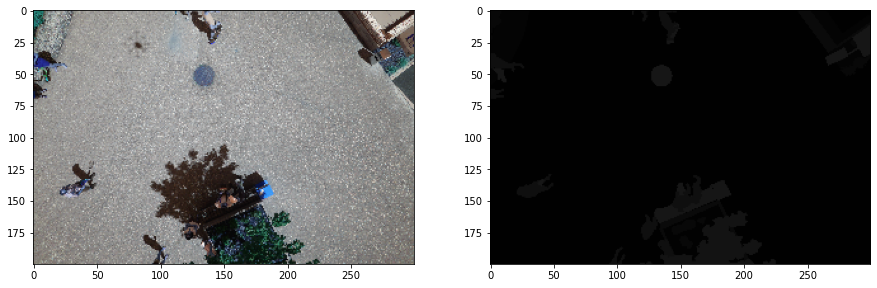

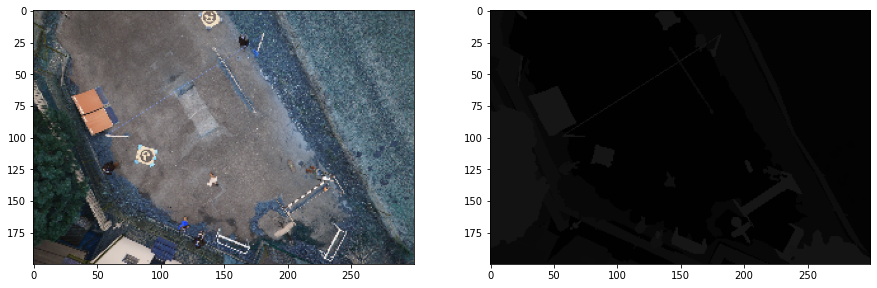

[[[ 4  4  4 ...  4  4  4]
  [ 4  4  4 ...  4  4  4]
  [ 4  4  4 ...  4  4  4]
  ...
  [ 3 22 22 ...  5  5  5]
  [22 22 22 ...  5  5  5]
  [22 22 22 ...  5  5  5]]

 [[ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  ...
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]
  [ 1  1  1 ...  1  1  1]]

 [[ 4  4  4 ...  1  1  1]
  [ 4  4  4 ...  1  1  1]
  [ 4  4  4 ...  1  1  1]
  ...
  [ 1  1  1 ...  1 22 22]
  [ 1  1  1 ...  1  1 17]
  [ 1  1  1 ...  1  1  1]]

 ...

 [[ 3  3  3 ...  3  3  3]
  [ 3  3  3 ...  3  3  3]
  [ 3  3  3 ...  3  3  3]
  ...
  [ 3  3  3 ...  3  3  3]
  [ 3  3  3 ...  3  3  3]
  [ 3  3  3 ...  3  3  3]]

 [[ 9  9  9 ... 13 13 13]
  [ 9  9  9 ... 13 13 13]
  [ 9  9  9 ... 13 13 13]
  ...
  [ 9  9  9 ...  9  9  9]
  [ 9  9  9 ...  9  9  9]
  [ 9  9  9 ...  9  9  9]]

 [[ 1  1  1 ...  1  1 22]
  [ 1  1  1 ...  1 22 22]
  [ 1  1  1 ... 22 22 22]
  ...
  [10 19  1 ...  4  4  4]
  [ 1  1  1 ...  4  4  4]
  [ 1  1  1 ...  4  4  4]]]


In [35]:
for i in range(2):
  display_images([images[i], labels[i]])



#Model-Resnet Improved Method




Model Created.



Epoch 1/25
48/48 [==============================] - 368s 7s/step - loss: 0.8789 - accuracy: 0.0060 - val_loss: 0.9791 - val_accuracy: 7.2616e-04
Epoch 2/25
48/48 [==============================] - 332s 7s/step - loss: 0.8157 - accuracy: 8.4248e-04 - val_loss: 0.8788 - val_accuracy: 0.0010
Epoch 3/25
48/48 [==============================] - 326s 7s/step - loss: 0.7986 - accuracy: 7.3617e-04 - val_loss: 0.8293 - val_accuracy: 9.7523e-04
Epoch 4/25
48/48 [==============================] - 332s 7s/step - loss: 0.7827 - accuracy: 9.0515e-04 - val_loss: 0.8016 - val_accuracy: 7.3171e-04
Epoch 5/25
48/48 [==============================] - 331s 7s/step - loss: 0.7670 - accuracy: 0.0012 - val_loss: 0.7764 - val_accuracy: 6.3264e-04
Epoch 6/25
48/48 [==============================] - 337s 7s/step - loss: 0.7495 - accuracy: 0.0014 - val_loss: 0.7511 - val_accuracy: 5.6551e-04
Epoch 7/25
48/48 [==============================] - 357s 7s/step - loss: 0.7335 - accuracy: 7.6134e-0

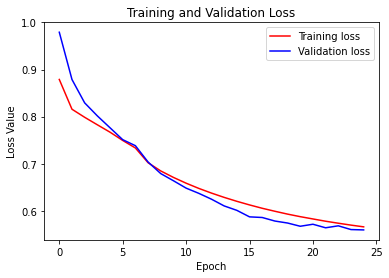

In [38]:
def build_model():
  #input_Layer = tf.keras.Input(shape=(train_images[0].shape))
  input_Layer = tf.keras.Input(shape=((200,300,3)))
  resnet_layers = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_tensor=input_Layer)
  resnet_layers.trainable = False


  #NOTE My layers do not contain residual connections yet
  decoder = tf.keras.layers.Conv2DTranspose(filters=1028, kernel_size=(3,3), strides=(2,2), padding='same', output_padding=(0,0))(resnet_layers.layers[-1].output)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.layers.Activation(tf.keras.activations.relu)(decoder)
  decoder = tf.keras.layers.Conv2DTranspose(filters=512, kernel_size=(3,3), strides=(2,2), padding='same', output_padding=(0,1))(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.layers.Activation(tf.keras.activations.relu)(decoder)
  decoder = tf.keras.layers.Conv2DTranspose(filters=256, kernel_size=(3,3), strides=(2,2), padding='same', output_padding=(1,0))(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.layers.Activation(tf.keras.activations.relu)(decoder)
  decoder = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=(2,2), padding='same', output_padding=(1,1))(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.layers.Activation(tf.keras.activations.relu)(decoder)
  decoder = tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), strides=(2,2), padding='same', output_padding=(1,1))(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.layers.Activation(tf.keras.activations.relu)(decoder)
  decoder = tf.keras.layers.Conv2DTranspose(filters=3, kernel_size=(1,1), strides=(1,1), padding='same', output_padding=(0,0))(decoder)
  decoder = tf.keras.layers.BatchNormalization()(decoder)
  decoder = tf.keras.layers.Activation(tf.keras.activations.relu)(decoder)

  print('\n\n\nModel Created.\n\n\n')
  model = tf.keras.Model(inputs=input_Layer, outputs=decoder, name="resnet_model")
  #model.summary()
  #tf.keras.utils.plot_model(decoder_model, show_shapes=True)

  return model

model = build_model()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])

hist = model.fit(X_train, Y_train, batch_size=BATCHSIZE, epochs=EPOCHS, validation_data=(X_val, Y_val), verbose=1)
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(EPOCHS)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
# plt.ylim([0, 1])
plt.legend()
plt.show()


#Predictions

(200, 300, 3)
(200, 300)
(200, 300, 3)
[[0.45454545 0.45454545 0.45454545 ... 0.04545455 0.04545455 0.04545455]
 [0.45454545 0.45454545 0.45454545 ... 0.04545455 0.04545455 0.04545455]
 [0.45454545 0.45454545 0.45454545 ... 0.04545455 0.04545455 0.04545455]
 ...
 [0.18181818 0.18181818 0.18181818 ... 0.36363636 0.36363636 0.36363636]
 [0.18181818 0.18181818 0.18181818 ... 0.36363636 0.36363636 0.36363636]
 [0.18181818 0.18181818 0.18181818 ... 0.36363636 0.36363636 0.36363636]]
0
(200, 300, 1)
[0 2]
(40, 200, 300, 1)
(40, 200, 300)


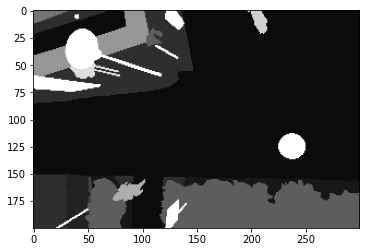

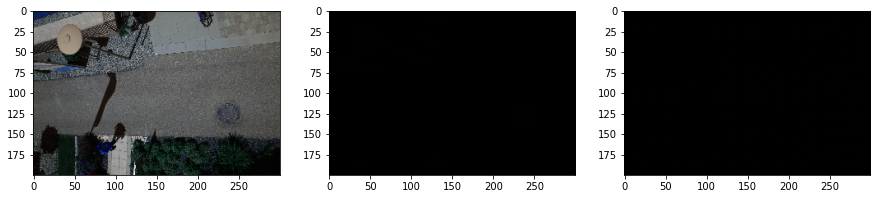

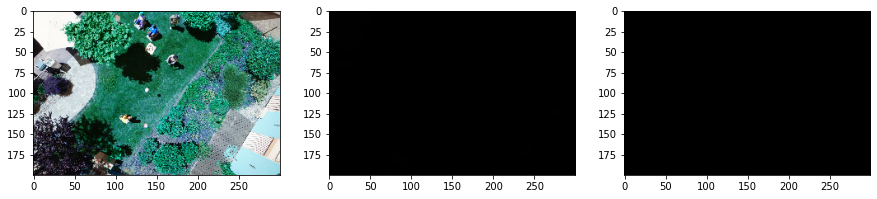

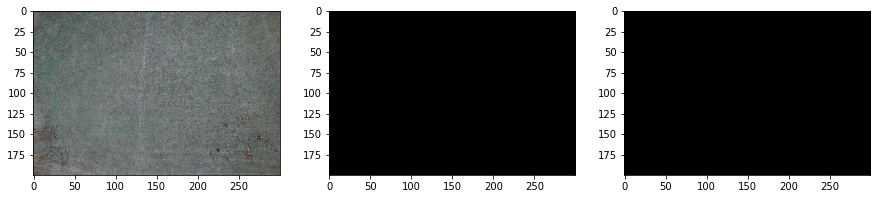

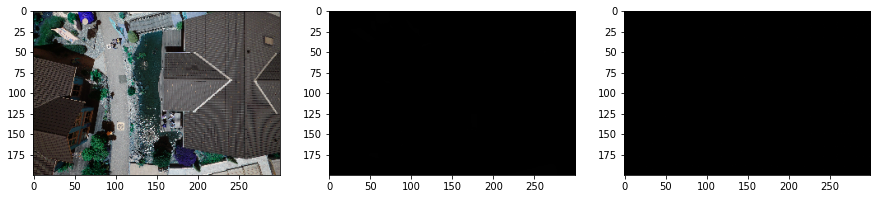

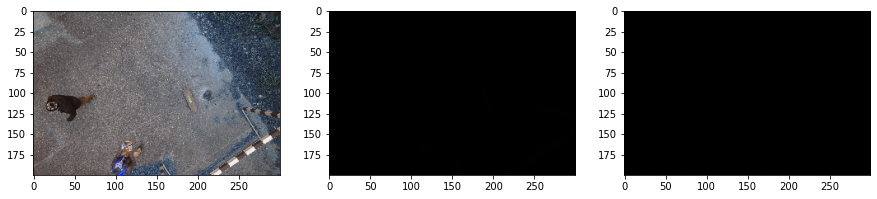

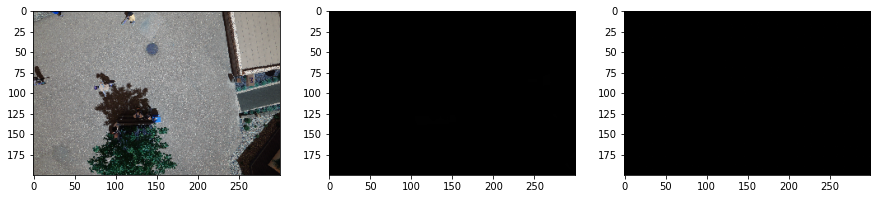

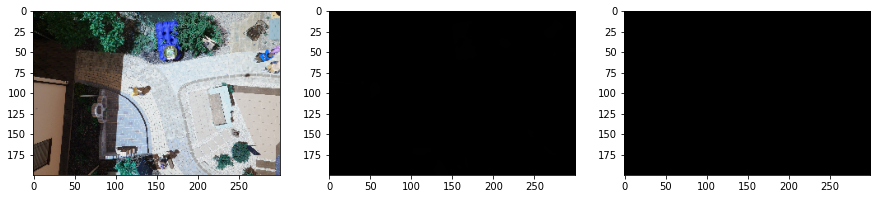

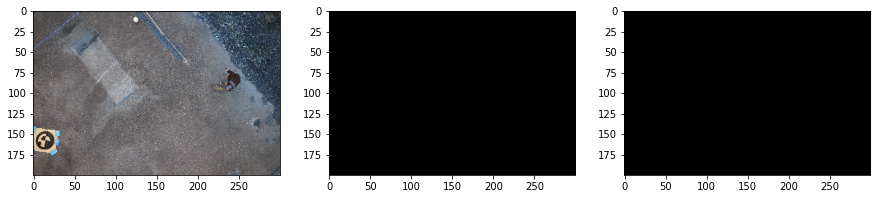

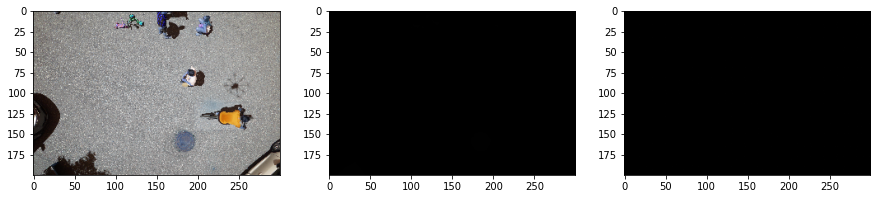

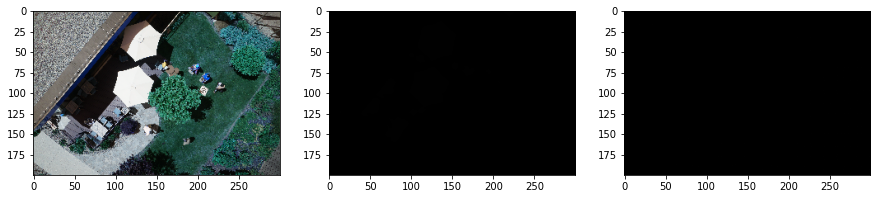

In [39]:
print(x_test[0].shape)
predictions = model.predict(x_test)*22
print(y_test[0].shape)
print(predictions[0].shape)
print(y_test[0])
print(np.argmax(predictions[0,0,0,:], axis=-1))
# print(predictions[0].shape)
# print(np.unique(predictions[0,:,:,0]))
# for i in range(5):
#   print(len(predictions[i].shape))
#   print(predictions[i].shape)
#   display_images([x_test[i], predictions[i]])
plt.imshow(x_test[0])


def create_mask(pred):
  mask = np.argmax(pred, axis=-1)
  mask = mask[..., np.newaxis]
  return mask

predictions_processed = np.array([create_mask(predictions[i]) for i in range(len(predictions))])


prediction_converted = create_mask(predictions[0])
print(prediction_converted.shape)
print(np.unique(prediction_converted))
plt.imshow(prediction_converted[:,:,0], cmap='gray')

plt.imshow(y_test[0], cmap='gray')

print(predictions_processed.shape)
print(np.squeeze(predictions_processed).shape)
predictions_processed = np.squeeze(predictions_processed)


for i in range(10):
  display_images([x_test[i], y_test[i], predictions_processed[i]])